In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Path to your Excel file
file_path = './UPDATED_NM student infractions 2010-2022.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the DataFrame
print(df)

                   District Name  District Code  \
0       ABQ SCHOOL OF EXCELLENCE            516   
1       ABQ SCHOOL OF EXCELLENCE            516   
2       ABQ SCHOOL OF EXCELLENCE            516   
3       ABQ SCHOOL OF EXCELLENCE            516   
4       ABQ SCHOOL OF EXCELLENCE            516   
...                          ...            ...   
285912                      ZUNI             89   
285913                      ZUNI             89   
285914                      ZUNI             89   
285915                      ZUNI             89   
285916                      ZUNI             89   

       Location Organization Type Code School Year Student Grade Level  \
0                              Charter  2014-06-30                   8   
1                              Charter  2014-06-30                   8   
2                              Charter  2014-06-30                   8   
3                              Charter  2014-06-30                   8   
4                

In [2]:
column_names = df.columns
print(column_names)

Index(['District Name', 'District Code', 'Location Organization Type Code',
       'School Year', 'Student Grade Level', 'Infraction Event ID',
       'Discipline Infraction Date', 'Discipline Infraction Code',
       'Discipline Infraction', 'Drug Related', 'Alcohol Related',
       'Gang Related', 'Hate Crime', 'Serious Injury', 'Criminal Charge Code',
       'Repeat Offender', 'Discipline Response Code', 'Discipline Response',
       'Discipline Response Duration', 'Admin First Name', 'Admin Last Name',
       'Admin License Number', 'Student Gender Code',
       'Student Race Ethnicity Derived', 'Student Hispanic Indicator',
       'Special Ed Status Code', 'Gifted Participation Code', 'Immigrant',
       'Food Program Participation Code', 'Section 504 Status', 'R3', 'W1',
       'W2', 'W4', 'W5', 'WD', 'WDO', 'WG', 'WC'],
      dtype='object')


In [3]:
race_counts = df['Repeat Offender'].value_counts()
print(race_counts)

Repeat Offender
N    179211
Y    106706
Name: count, dtype: int64


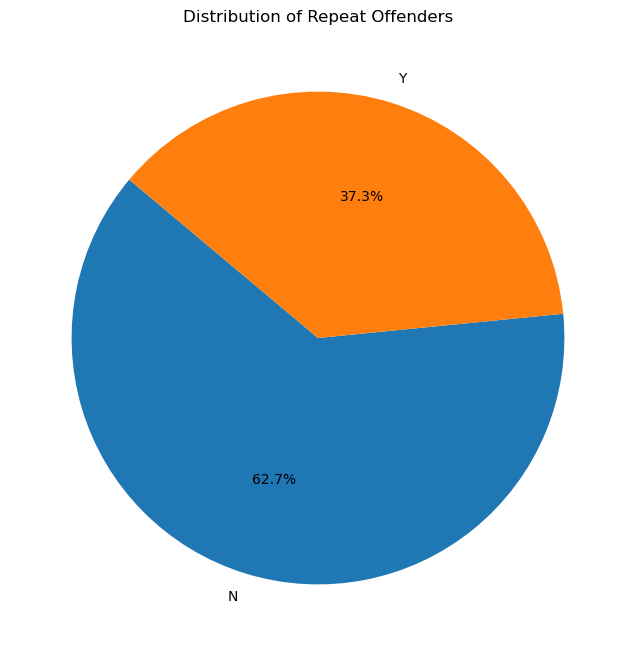

In [4]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'Repeat Offender' column
repeat_offender_counts = df['Repeat Offender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(repeat_offender_counts, labels=repeat_offender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Repeat Offenders')
plt.show()


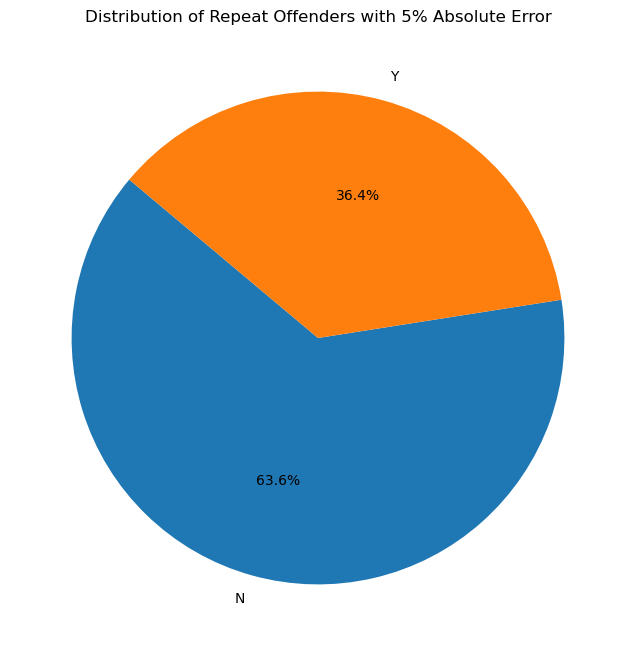

In [5]:
import numpy as np

# Introduce a 5% variance to each count
varied_counts = repeat_offender_counts.apply(lambda x: x * np.random.uniform(0.95, 1.05))

# Normalize the counts to ensure the total remains the same as the original total count
normalized_counts = (varied_counts / varied_counts.sum()) * repeat_offender_counts.sum()

# Round the normalized counts to get integer values
normalized_counts = normalized_counts.round().astype(int)

# Plot a pie chart with the normalized counts
plt.figure(figsize=(8, 8))
plt.pie(normalized_counts, labels=normalized_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Repeat Offenders with 5% Absolute Error')
plt.show()


In [6]:
race_counts = df['Student Race Ethnicity Derived'].value_counts()
print(race_counts)

Student Race Ethnicity Derived
Hispanic                                     176193
Caucasian                                     47626
American Indian/Alaskan Native                44545
Black or African American                     10617
Multiracial                                    4957
Native Hawaiian or Other Pacific Islander      1050
Asian                                           929
Name: count, dtype: int64


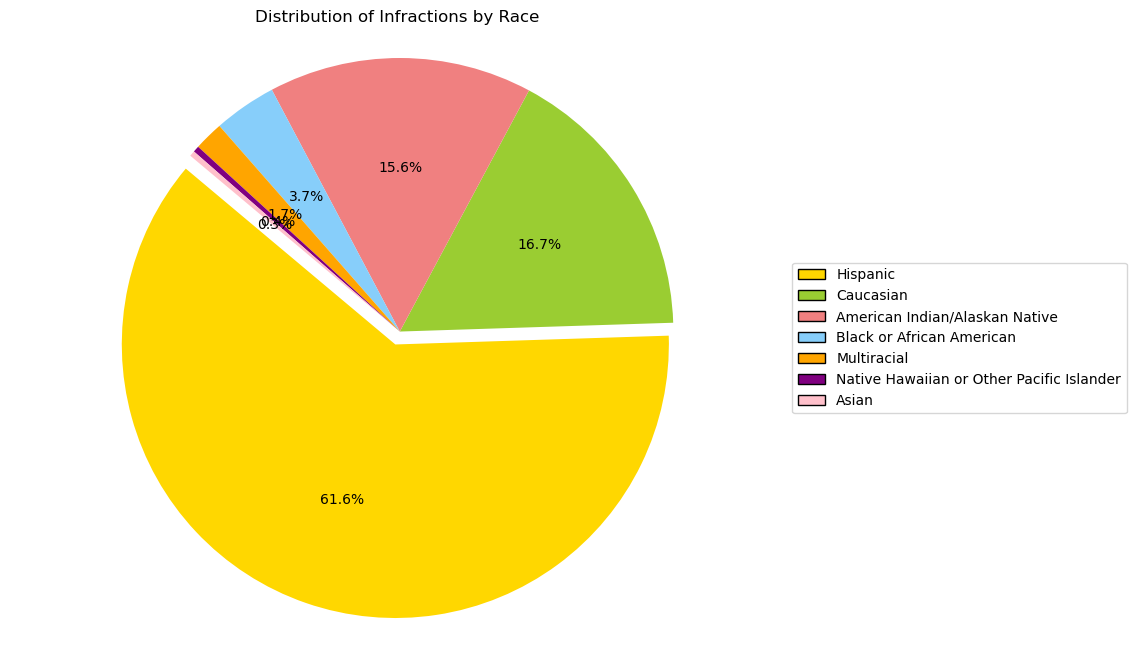

In [7]:
# Data for the pie chart
labels = ['Hispanic', 'Caucasian', 'American Indian/Alaskan Native', 
          'Black or African American', 'Multiracial', 
          'Native Hawaiian or Other Pacific Islander', 'Asian']
sizes = [176193, 47626, 44545, 10617, 4957, 1050, 929]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'purple', 'pink']
explode = (0.05, 0, 0, 0, 0, 0, 0)  # explode the 1st slice (Hispanic)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=None, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Infractions by Race')

# Create custom legend
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [8]:
# Grouping by race and infraction type, and counting the occurrences of each infraction
grouped_data = df.groupby(['Student Race Ethnicity Derived', 'Discipline Infraction']).size().unstack().fillna(0)

# Getting the top 5 infractions for each race
top_infractions_by_race = {}
for race in grouped_data.index:
    top_infractions_by_race[race] = grouped_data.loc[race].nlargest(5)

# Displaying the top 5 infractions for each race
for race, top_infractions in top_infractions_by_race.items():
    print(f"Race: {race}")
    print(top_infractions)
    print()

Race: American Indian/Alaskan Native
Discipline Infraction
Disorderly Conduct                      19561.0
Drug Violation                           7337.0
Assault/battery simple                   4651.0
Assault/battery with hands/feet/fist     3076.0
Other Violence - General                 2199.0
Name: American Indian/Alaskan Native, dtype: float64

Race: Asian
Discipline Infraction
Disorderly Conduct                      187.0
Assault/battery simple                  169.0
Assault/battery with hands/feet/fist    169.0
Drug Violation                          104.0
Tobacco Use                              61.0
Name: Asian, dtype: float64

Race: Black or African American
Discipline Infraction
Disorderly Conduct                      3656.0
Assault/battery with hands/feet/fist    2360.0
Assault/battery simple                  1261.0
Drug Violation                           863.0
Other Violence - General                 343.0
Name: Black or African American, dtype: float64

Race: Caucasian


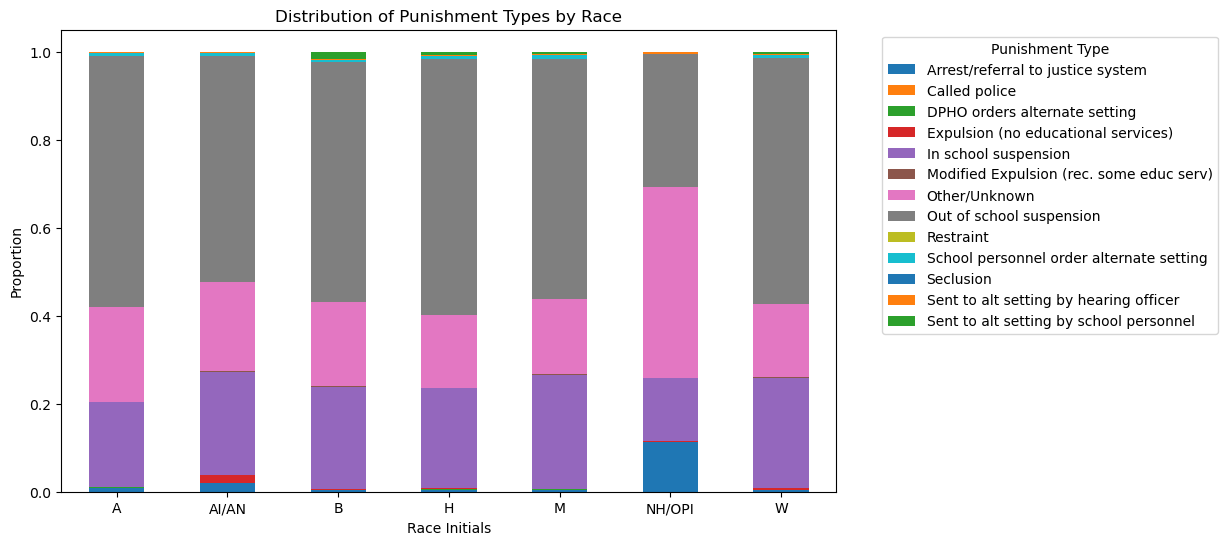

In [9]:
# Map race names to initials
race_initials = {
    'Caucasian': 'W',
    'Black or African American': 'B',
    'Hispanic': 'H',
    'American Indian/Alaskan Native': 'AI/AN',
    'Multiracial': 'M',
    'Native Hawaiian or Other Pacific Islander': 'NH/OPI',
    'Asian': 'A',
    
    
}           

# Add a new column with race initials
df['Race Initials'] = df['Student Race Ethnicity Derived'].map(race_initials)

# Group by Race Initials and Punishment Type, and count the occurrences
punishment_counts = df.groupby(['Race Initials', 'Discipline Response']).size().unstack(fill_value=0)

# Normalize the counts by the total number of infractions for each race
normalized_counts = punishment_counts.div(punishment_counts.sum(axis=1), axis=0)

# Plotting
normalized_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Punishment Types by Race')
plt.xlabel('Race Initials')
plt.ylabel('Proportion')
plt.legend(title='Punishment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

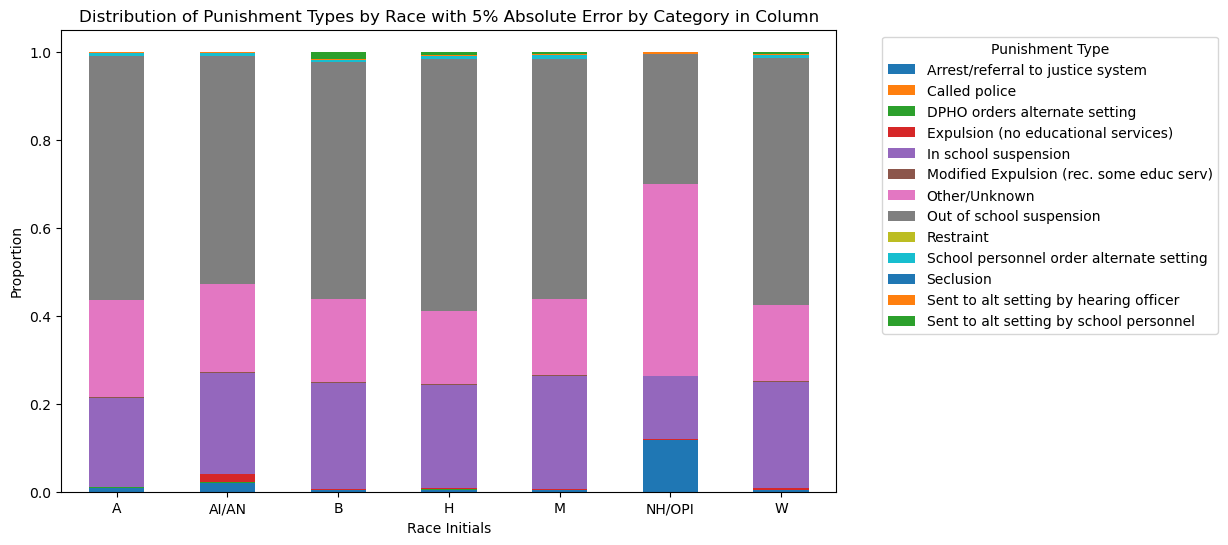

In [10]:
# Introduce a 5% variance to each segment within the proportions
varied_counts = normalized_counts.apply(lambda x: x * np.random.uniform(0.95, 1.05, size=len(x)), axis=1)

# Normalize the varied counts to ensure the total proportion for each race is 1
varied_counts_normalized = varied_counts.div(varied_counts.sum(axis=1), axis=0)

# Plotting the varied and normalized data
varied_counts_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Punishment Types by Race with 5% Absolute Error by Category in Column')
plt.xlabel('Race Initials')
plt.ylabel('Proportion')
plt.legend(title='Punishment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


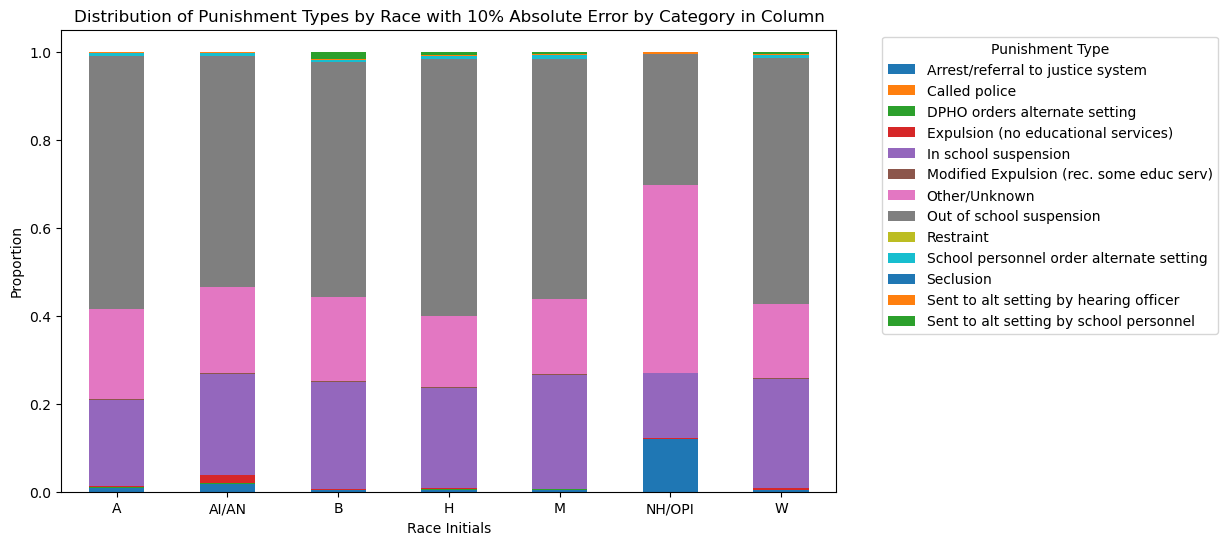

In [30]:
# Introduce a 5% variance to each segment within the proportions
varied_counts = normalized_counts.apply(lambda x: x * np.random.uniform(0.9, 1.0, size=len(x)), axis=1)

# Normalize the varied counts to ensure the total proportion for each race is 1
varied_counts_normalized = varied_counts.div(varied_counts.sum(axis=1), axis=0)

# Plotting the varied and normalized data
varied_counts_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Punishment Types by Race with 10% Absolute Error by Category in Column')
plt.xlabel('Race Initials')
plt.ylabel('Proportion')
plt.legend(title='Punishment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

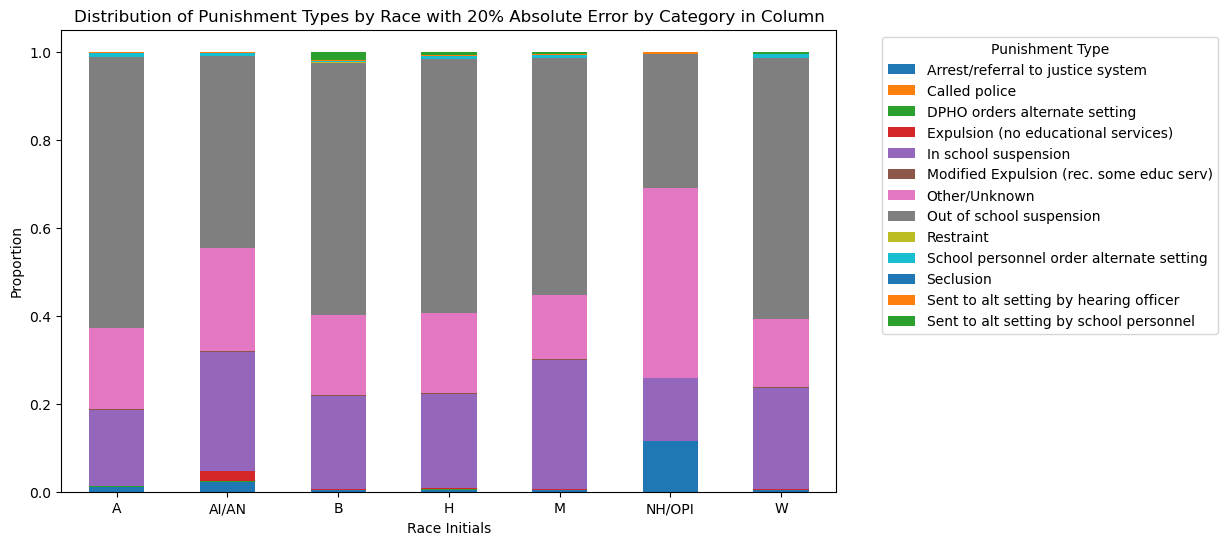

In [27]:
# Introduce a 5% variance to each segment within the proportions
varied_counts = normalized_counts.apply(lambda x: x * np.random.uniform(0.8, 1.2, size=len(x)), axis=1)

# Normalize the varied counts to ensure the total proportion for each race is 1
varied_counts_normalized = varied_counts.div(varied_counts.sum(axis=1), axis=0)

# Plotting the varied and normalized data
varied_counts_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Punishment Types by Race with 20% Absolute Error by Category in Column')
plt.xlabel('Race Initials')
plt.ylabel('Proportion')
plt.legend(title='Punishment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Calculate the percentage of each punishment type within each race
percentage_counts = normalized_counts * 100

# Print out the percentage of each race's punishment
print("Percentage of Each Race's Punishment:")
print(percentage_counts)

Percentage of Each Race's Punishment:
Discipline Response  Arrest/referral to justice system  Called police  \
Race Initials                                                           
A                                             0.862999       0.000000   
AI/AN                                         1.940538       0.002264   
B                                             0.349188       0.018875   
H                                             0.486431       0.002845   
M                                             0.364004       0.000000   
NH/OPI                                       11.235955       0.000000   
W                                             0.390658       0.004223   

Discipline Response  DPHO orders alternate setting  \
Race Initials                                        
A                                         0.215750   
AI/AN                                     0.142653   
B                                         0.075500   
H                                 

In [14]:
gender_counts = df['Student Gender Code'].value_counts()
print(gender_counts)

Student Gender Code
M    204055
F     81862
Name: count, dtype: int64


In [15]:
# Group by gender and infraction type, and count the occurrences
grouped_data = df.groupby(['Student Gender Code', 'Discipline Infraction']).size().unstack().fillna(0)

# Get the top 10 crimes for each gender
top_crimes_by_gender = {}
for gender in grouped_data.index:
    top_crimes_by_gender[gender] = grouped_data.loc[gender].nlargest(20)

# Display the top 10 crimes for each gender
for gender, top_crimes in top_crimes_by_gender.items():
    print(f"Gender: {gender}")
    print(top_crimes)
    print()

Gender: F
Discipline Infraction
Disorderly Conduct                                                                  25256.0
Assault/battery with hands/feet/fist                                                15030.0
Drug Violation                                                                      11301.0
Assault/battery simple                                                              10398.0
Tobacco Use                                                                          3416.0
Other Violence - General                                                             2992.0
Bullying                                                                             2439.0
Missing Property/Theft                                                               2124.0
Bullying or Harassment NOT based on sex/race/color/national origin or disability     1790.0
Alcohol Violation - Use                                                              1506.0
Weapons Possession - Knife/Cutting              

In [16]:
district_counts = df['District Name'].value_counts()
print(district_counts)

District Name
ALBUQUERQUE                                88971
CLOVIS                                     28469
GALLUP                                     28192
LAS CRUCES                                 21580
RIO RANCHO                                 10443
                                           ...  
MOSQUERO                                       1
MELROSE                                        1
SANDOVAL ACADEMY OF BILINGUAL EDUCATION        1
SOUTHWEST PRIMARY LEARNING CENTER              1
LA RESOLANA LEADERSHIP                         1
Name: count, Length: 161, dtype: int64


In [17]:
# Get the top 5 districts with the most incidents
top_districts = df['District Name'].value_counts().head(5).index

# Filter the DataFrame to include only the top 10 districts
top_districts_df = df[df['District Name'].isin(top_districts)]

# Group by student's grade level and district name, and count the occurrences
infraction_counts_by_grade = top_districts_df.groupby(['Student Grade Level', 'District Name']).size().unstack().fillna(0)

# Display the result
print(infraction_counts_by_grade)

District Name        ALBUQUERQUE  CLOVIS  GALLUP  LAS CRUCES  RIO RANCHO
Student Grade Level                                                     
1                         2819.0   245.0   318.0       485.0        42.0
10                        7283.0  4401.0  4647.0      2350.0      2132.0
11                        3984.0  2677.0  3322.0      1262.0      1288.0
12                        2299.0  1117.0  2065.0       839.0       785.0
2                         3010.0   320.0   339.0       435.0        58.0
3                         3215.0   452.0   478.0       530.0        65.0
4                         3529.0   689.0   522.0       632.0        84.0
5                         4167.0   757.0   639.0       835.0        83.0
6                        13563.0  4621.0  2940.0      2785.0       863.0
7                        15246.0  4597.0  3667.0      3460.0      1225.0
8                        14569.0  5074.0  3811.0      3391.0      1301.0
9                        13067.0  2999.0  4978.0   

In [18]:
# Get the top 5 most incident schools
top_schools = df['District Name'].value_counts().head(5).index

# Filter the DataFrame to include only data for the top 5 schools
top_schools_df = df[df['District Name'].isin(top_schools)]

# Group by district name and infraction type, and count the occurrences
grouped_data = top_schools_df.groupby(['District Name', 'Discipline Infraction']).size().unstack().fillna(0)

# Get the top 5 infractions for each school
top_infractions_by_district = {}
for district in top_schools:
    top_infractions_by_district[district] = grouped_data.loc[district].nlargest(5)

# Display the top 5 infractions for each school
for district, top_infractions in top_infractions_by_district.items():
    print(f"District: {district}")
    print(top_infractions)
    print()

District: ALBUQUERQUE
Discipline Infraction
Assault/battery with hands/feet/fist    25305.0
Assault/battery simple                  14301.0
Disorderly Conduct                      11545.0
Drug Violation                          11394.0
Bullying                                 3728.0
Name: ALBUQUERQUE, dtype: float64

District: CLOVIS
Discipline Infraction
Disorderly Conduct                      20513.0
Assault/battery with hands/feet/fist     4201.0
Drug Violation                            584.0
Tobacco Use                               566.0
Vandalism                                 402.0
Name: CLOVIS, dtype: float64

District: GALLUP
Discipline Infraction
Disorderly Conduct                      19016.0
Assault/battery simple                   2516.0
Drug Violation                           2221.0
Other Violence - General                 1661.0
Assault/battery with hands/feet/fist      490.0
Name: GALLUP, dtype: float64

District: LAS CRUCES
Discipline Infraction
Disorderly Conduct  

In [19]:
grade_counts = df['Student Grade Level'].value_counts()
print(grade_counts)

Student Grade Level
9     46487
8     45976
7     44601
6     35301
10    33491
11    20416
12    12111
5     11651
4      9322
3      7849
2      6732
1      6359
KF     4749
PK      862
OS       10
Name: count, dtype: int64


In [20]:
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Extract the month from the 'Discipline Infraction Date' column
df['Month'] = pd.to_datetime(df['Discipline Infraction Date']).dt.month

# Map months to seasons
df['Season'] = df['Month'].apply(get_season)

Season
Fall      101797
Spring     82872
Summer     13642
Winter     87606
dtype: int64


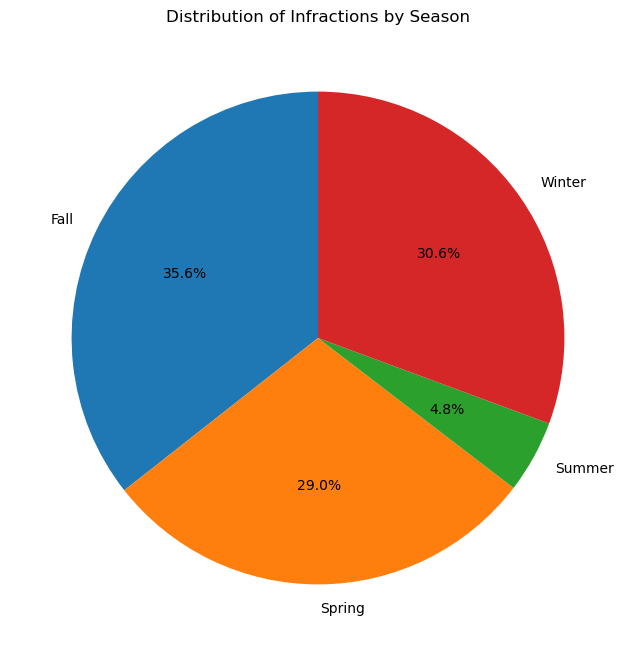

In [21]:
# Group by season and count the occurrences
infractions_by_season = df.groupby('Season').size()

# Display the result
print(infractions_by_season)

# Group by season and count the occurrences
infractions_by_season = df.groupby('Season').size()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(infractions_by_season, labels=infractions_by_season.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Infractions by Season')
plt.show()

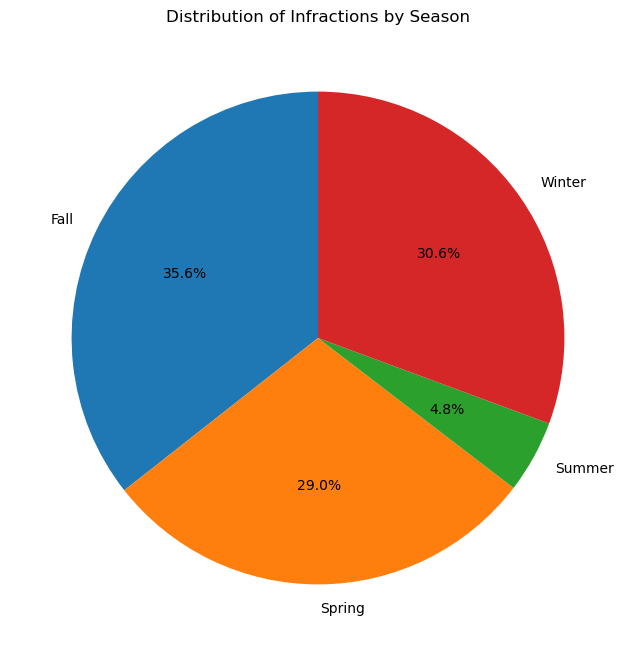

In [22]:
# Group by season and count the occurrences
infractions_by_season = df.groupby('Season').size()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(infractions_by_season, labels=infractions_by_season.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Infractions by Season')
plt.show()

In [23]:
# Group by season and infraction type, and count the occurrences
grouped_data = df.groupby(['Season', 'Discipline Infraction']).size().unstack().fillna(0)

# Get the top 5 crimes for each season
top_crimes_by_season = {}
for season in grouped_data.index:
    top_crimes_by_season[season] = grouped_data.loc[season].nlargest(10)

# Display the top 5 crimes for each season
for season, top_crimes in top_crimes_by_season.items():
    print(f"Season: {season}")
    print(top_crimes)
    print()

Season: Fall
Discipline Infraction
Disorderly Conduct                                                                  29720.0
Assault/battery with hands/feet/fist                                                17259.0
Drug Violation                                                                      13336.0
Assault/battery simple                                                              13240.0
Tobacco Use                                                                          5128.0
Other Violence - General                                                             4061.0
Bullying                                                                             2716.0
Missing Property/Theft                                                               2401.0
Sexual Harassment                                                                    2113.0
Bullying or Harassment NOT based on sex/race/color/national origin or disability     1809.0
Name: Fall, dtype: float64

Season: Spring
Di

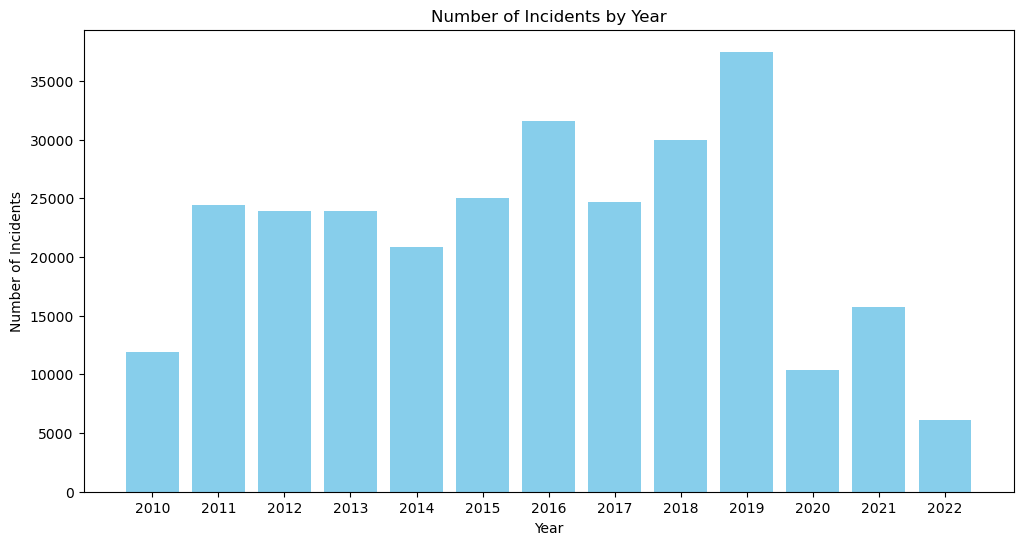

In [24]:
# Extract the year from the 'Discipline Infraction Date' column
df['Year'] = pd.to_datetime(df['Discipline Infraction Date']).dt.year

# Count the number of incidents for each year
incidents_by_year = df['Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(incidents_by_year.index, incidents_by_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Year')
plt.xticks(incidents_by_year.index)
plt.show()